# Credit Card Fraud: Data Mining Final Project
### By: Brain Zschau

The dataset we will be using can be found here: [https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

You can either download it manually and put the csv file into the folder datasets or set your kaggle username and kaggle key below and the dataset will be downloaded and extracted for you.

In [1]:
import os
from pathlib import Path
import zipfile

# Set your Kaggle API credentials (replace 'your_username' and 'your_key' with your actual Kaggle username and key)
os.environ['KAGGLE_USERNAME'] = 'your_username'
os.environ['KAGGLE_KEY'] = 'your_key'

# Specify the dataset you want to download
dataset_name = 'mlg-ulb/creditcardfraud'

# Specify the destination directory
destination_dir = Path('.') / 'datasets'

# Create the destination directory if it does not exist
destination_dir.mkdir(parents=True, exist_ok=True)

# Check if the file exists; if not, download it
zip_file_path = destination_dir / f'{dataset_name.split("/")[1]}.zip'
if not zip_file_path.is_file():
    # Download the dataset
    os.system(f'kaggle datasets download -d {dataset_name} -p {destination_dir}')

    # Extract the contents of the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_dir)

# List the contents of the destination directory
print(f"Contents of {destination_dir}: {os.listdir(destination_dir)}")

Contents of datasets: ['creditcard.csv', 'creditcardfraud.zip']


## Data Processing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from CSV
file_path = 'datasets/creditcard.csv'  # Change this to the actual path of your CSV file
data = pd.read_csv(file_path)

# Assuming your dataset has a column named 'label' for the target variable (Y)
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training, validation, and testing sets
# 70% training, 15% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Decision Trees 

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate overall accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy_dt:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()
prediction_time_dt = end_time - start_time
print(f'Prediction Speed: {prediction_time_dt:.4f} seconds')

# Calculate false negatives
conf_matrix_dt = confusion_matrix(y_test, y_pred)
false_negatives_dt = conf_matrix_dt[1, 0]
print(f'False Negatives: {false_negatives_dt}')

Overall Accuracy: 99.92%
Prediction Speed: 0.0065 seconds
False Negatives: 10


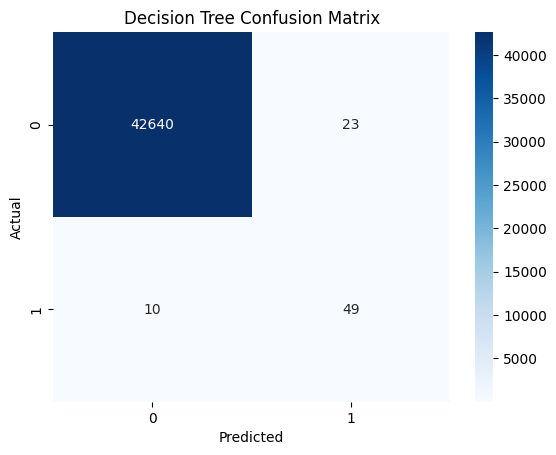

In [5]:
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# Evaluate the model on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate overall accuracy
accuracy_lr = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Overall Accuracy: {accuracy_lr:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_lr = logistic_model.predict(X_test)
end_time = time.time()
prediction_time_lr = end_time - start_time
print(f'Logistic Regression Prediction Speed: {prediction_time_lr:.4f} seconds')

# Calculate false negatives
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
false_negatives_lr = conf_matrix_lr[1, 0]
print(f'Logistic Regression False Negatives: {false_negatives_lr}')

Logistic Regression Overall Accuracy: 99.95%
Logistic Regression Prediction Speed: 0.0037 seconds
Logistic Regression False Negatives: 17


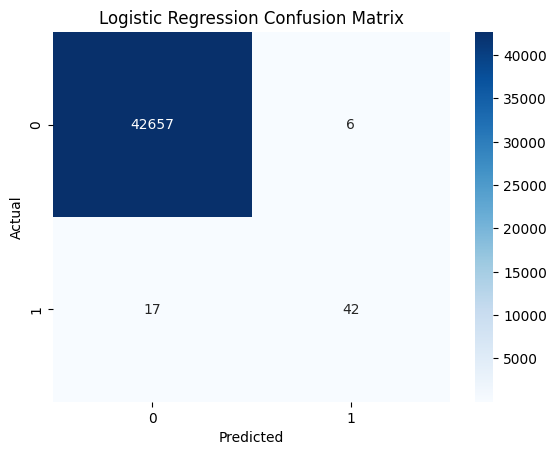

In [8]:
# Confusion Matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Random Forests

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Train a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the model on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate overall accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Overall Accuracy: {accuracy_rf:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_rf = random_forest_model.predict(X_test)
end_time = time.time()
prediction_time_rf = end_time - start_time
print(f'Random Forest Prediction Speed: {prediction_time_rf:.4f} seconds')

# Calculate false negatives
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
false_negatives_rf = conf_matrix_rf[1, 0]
print(f'Random Forest False Negatives: {false_negatives_rf}')

Random Forest Overall Accuracy: 99.97%
Random Forest Prediction Speed: 0.2560 seconds
Random Forest False Negatives: 9


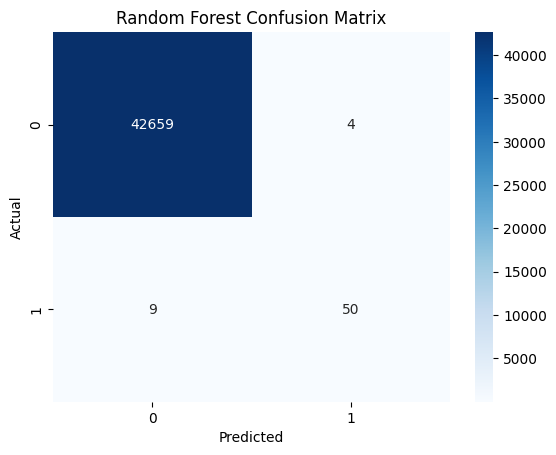

In [11]:
# Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Neural Networks

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple Neural Network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
6231/6231 [==============================] - 6s 966us/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.0022 - val_accuracy: 0.9994
Epoch 2/10
6231/6231 [==============================] - 6s 974us/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 3/10
6231/6231 [==============================] - 6s 924us/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 4/10
6231/6231 [==============================] - 6s 925us/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 5/10
6231/6231 [==============================] - 6s 924us/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 6/10
6231/6231 [==============================] - 6s 932us/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 7/10
6231/6231 [==============================] - 6s 926us/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0018 -

In [13]:
# Evaluate the model on the test set
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)

# Calculate overall accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Overall Accuracy: {accuracy_nn:.2%}')

# Measure prediction speed
start_time = time.time()
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)
end_time = time.time()
prediction_time_nn = end_time - start_time
print(f'Neural Network Prediction Speed: {prediction_time_nn:.4f} seconds')

# Calculate false negatives
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
false_negatives_nn = conf_matrix_nn[1, 0]
print(f'Neural Network False Negatives: {false_negatives_nn}')

1336/1336 [==============================] - 1s 598us/step
Neural Network Overall Accuracy: 99.94%
1336/1336 [==============================] - 1s 609us/step
Neural Network Prediction Speed: 1.1771 seconds
Neural Network False Negatives: 10


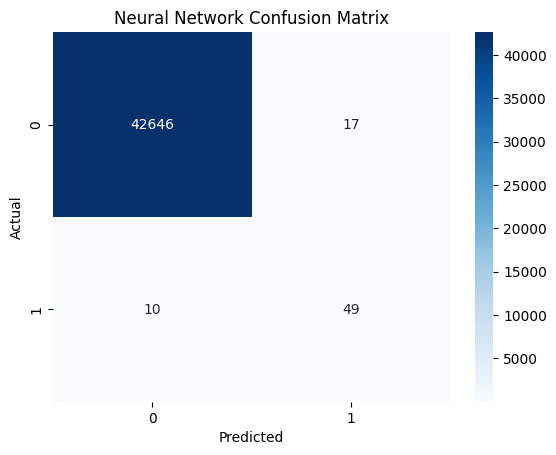

In [14]:
# Confustion Matrix
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Results

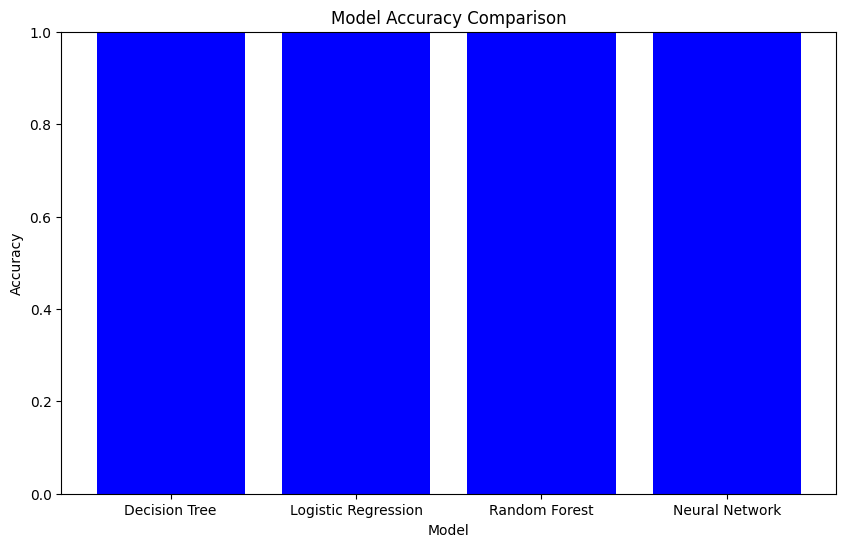

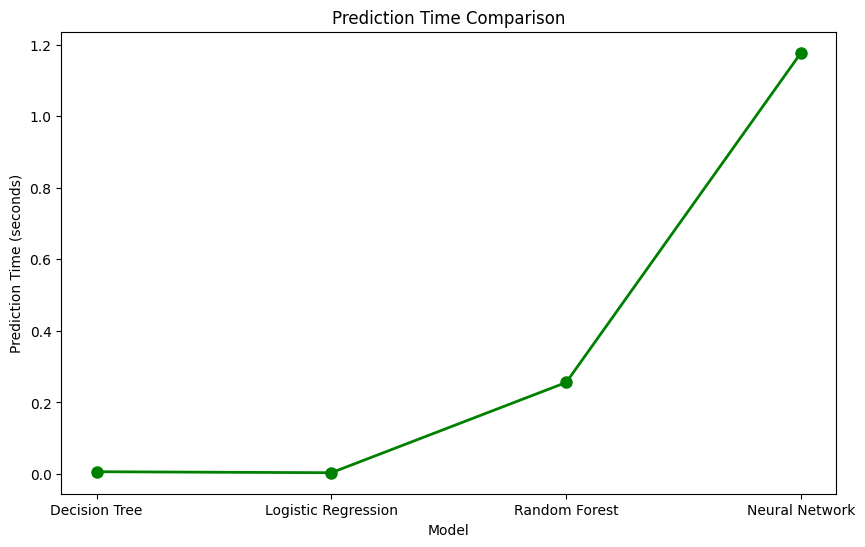

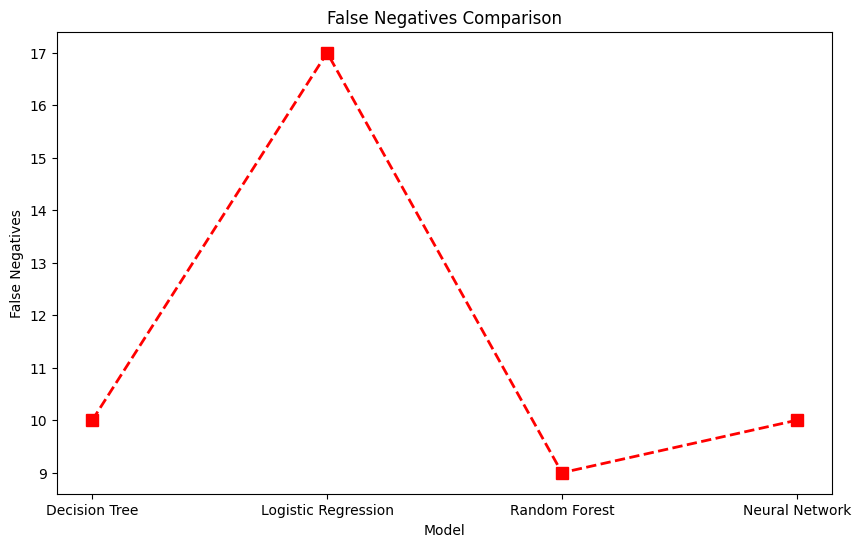

In [15]:
import matplotlib.pyplot as plt

# Assuming you have collected accuracy, prediction time, and false negatives for each model

models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Neural Network']
accuracy = [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_nn]
prediction_time = [prediction_time_dt, prediction_time_lr, prediction_time_rf, prediction_time_nn]
false_negatives = [false_negatives_dt, false_negatives_lr, false_negatives_rf, false_negatives_nn]

# Bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='blue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Line chart for prediction time
plt.figure(figsize=(10, 6))
plt.plot(models, prediction_time, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Prediction Time Comparison')
plt.xlabel('Model')
plt.ylabel('Prediction Time (seconds)')
plt.show()

# Line chart for false negatives
plt.figure(figsize=(10, 6))
plt.plot(models, false_negatives, marker='s', color='red', linestyle='--', linewidth=2, markersize=8)
plt.title('False Negatives Comparison')
plt.xlabel('Model')
plt.ylabel('False Negatives')
plt.show()